In [1]:
import sys
sys.path.append("../..")

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
# environments

from environment.deepqlearning.exploration_env import ExplorationEnv

In [4]:
from utils.reader import get_yaml_path, read_file

In [5]:
from utils.plotting import plot_all

In [6]:
from agent.scala_dqagent import DQAgent
from training.dqnetwork import DQNetwork

In [7]:
from evaluation.agent_evaluation import evaluate

In [8]:
server_address = "localhost:50051" # adjust the port as needed
client_name = "RLClient"
env = ExplorationEnv(server_address, client_name) # adjust the env as needed
env.connect_to_client()

2025-11-27 11:10:12,552 — INFO — ✓ Connected to localhost:50051



In [9]:
configs_path = get_yaml_path("src", "scripts", "resources", "generated", "env", "dq-exploration-fake-test")
# dq-exploration-test-no-obs
yml_files = sorted(configs_path.glob("*.yml"), key=lambda p: p.name)
configs = [read_file(f) for f in yml_files]
config = configs[0]
env.init(config)

(True, '')

In [10]:
neuron_count_per_hidden_layer = [64, 32]

In [11]:
agent_id = "00000000-0000-0000-0000-000000000001"
agent = DQAgent(
    env,
    agent_id=agent_id,
    action_model=DQNetwork(
        env.observation_space.shape,
        neuron_count_per_hidden_layer,
        env.action_space.n,
        summary=False,
    ),
    target_model=DQNetwork(
        env.observation_space.shape,
        neuron_count_per_hidden_layer,
        env.action_space.n,
        summary=False,
    ),
)
agents = { agent_id: agent }

In [12]:
path = get_yaml_path("src", "scripts", "resources", "generated", "checkpoints", "dq-exploration4", "5x5", "checkpoints_final")
for agent in agents.values():
    agent.load(path)

C:\Users\HP\Desktop\UNIBO\LaureaMagistrale\1_anno\Paradigmi di Programmazione e Sviluppo (PPS)\Esame\PPS-22-srs\python\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
did_succeed=lambda reward, termination, truncation: True if truncation and reward > 0 else False

In [14]:
results = evaluate(env=env, agents=agents, configs=configs, max_steps=50000, did_succeed=did_succeed)

Evaluation: 100%|██████████| 3/3 [33:58<00:00, 679.64s/configuration run] 


In [15]:
print(f'success_rate:             {results["success_rate"]}')
print(f'median steps to success:  {results["median_steps_to_success"]}')
print(f'successes_idx:          {results["successes_idx"]}')

success_rate:             {'00000000-0000-0000-0000-000000000001': 0.6666666666666666}
median steps to success:  {'00000000-0000-0000-0000-000000000001': np.float64(50000.0)}
successes_idx:          {'00000000-0000-0000-0000-000000000001': [0, 1]}


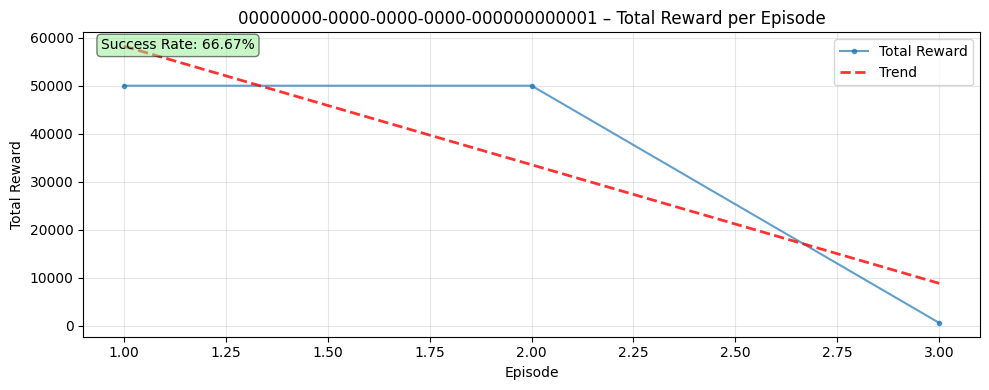

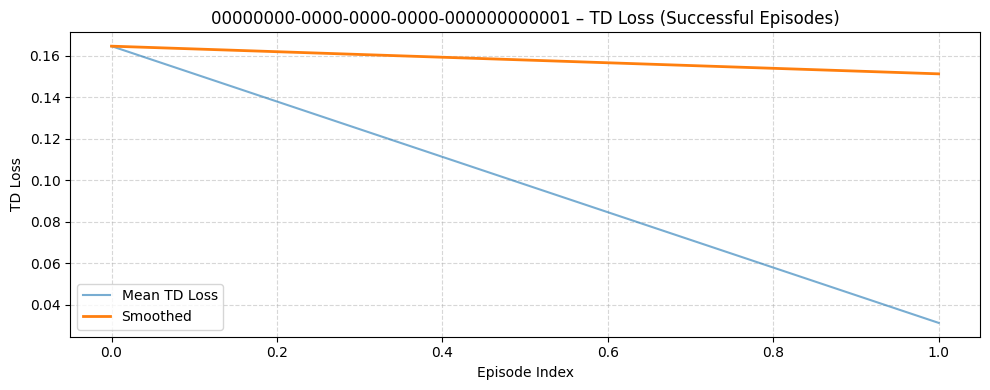

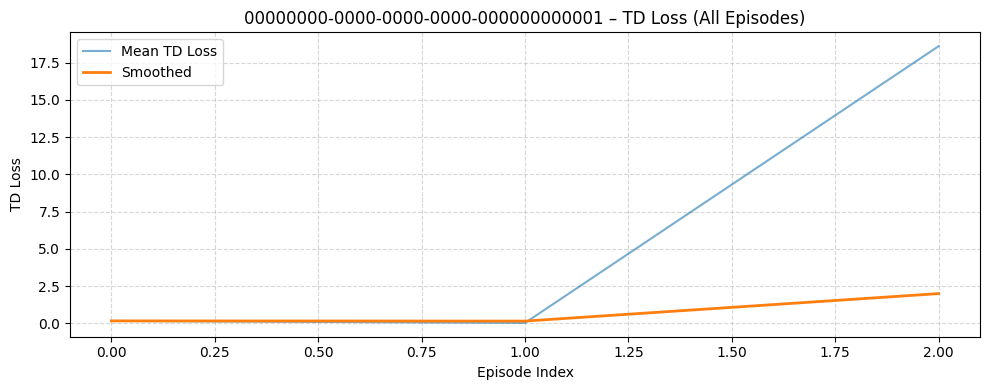

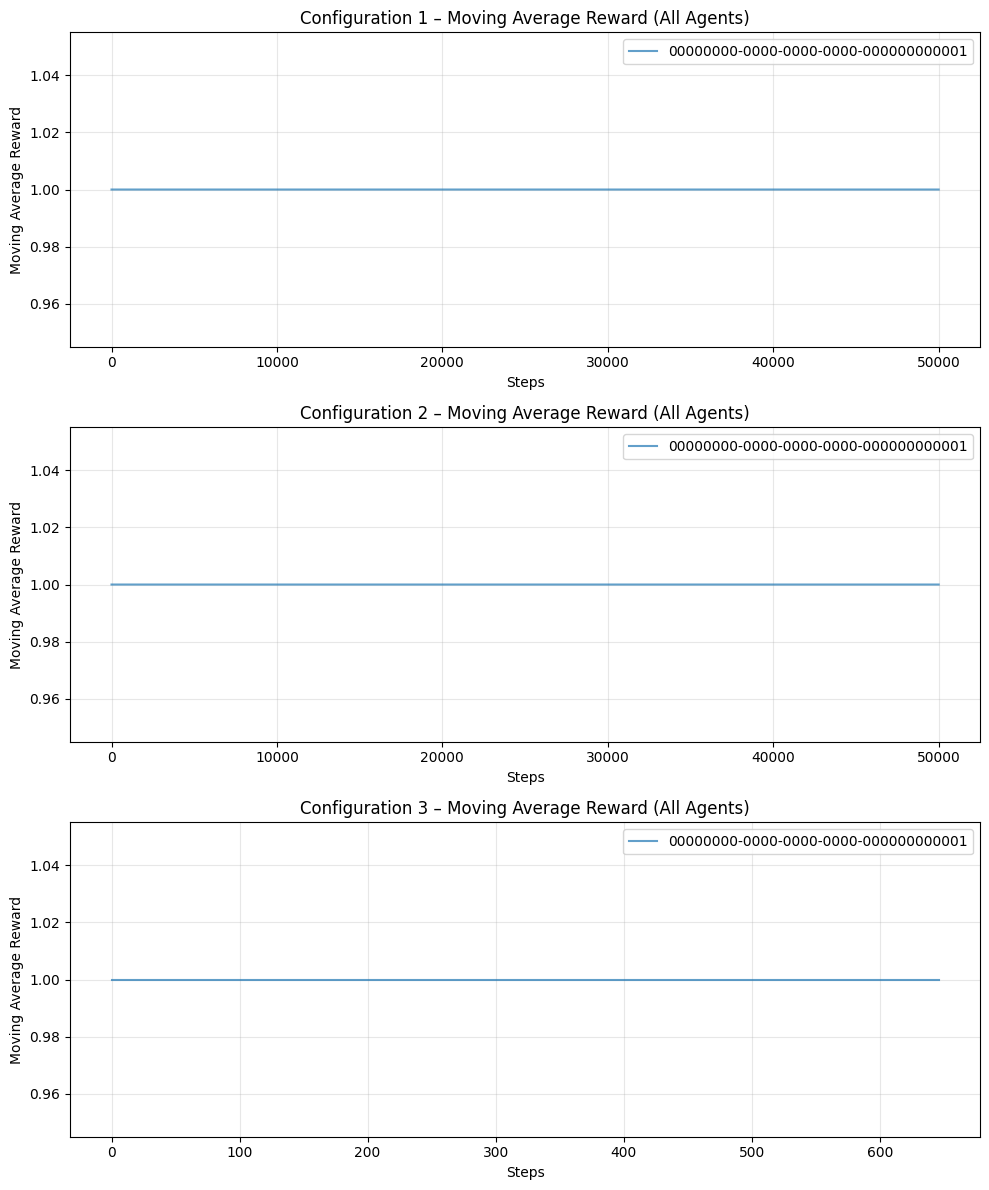

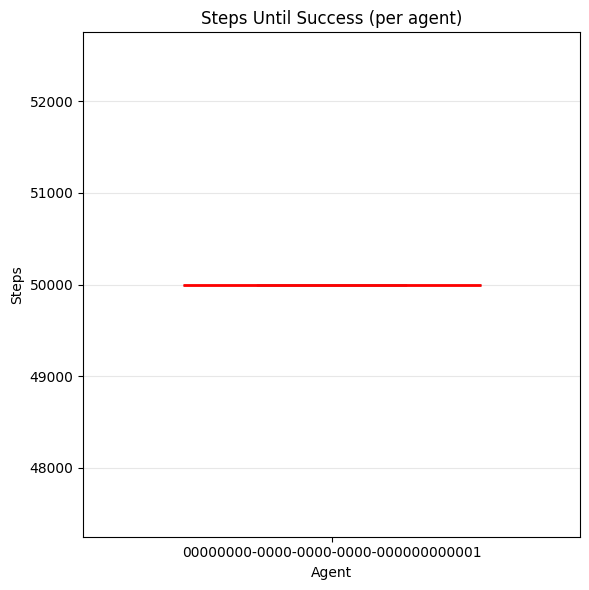

In [16]:
plot_all(results, agents=list(agents.keys()))